In [96]:
import pandas as pd
from data_loading import load_data

In [97]:
data, ingredients_df = load_data("cocktail_dataset.json")

# EDA

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import eda 

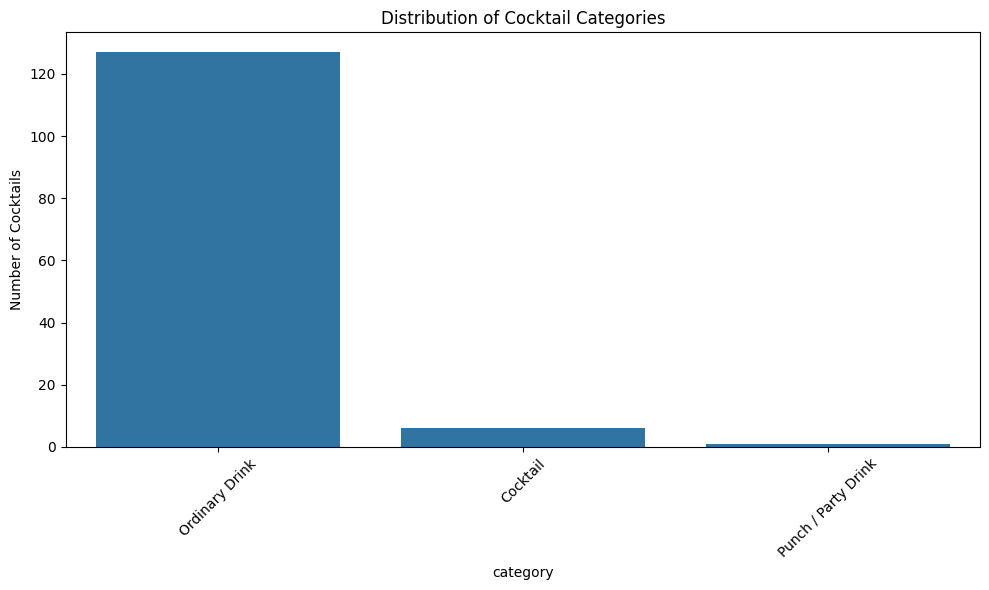

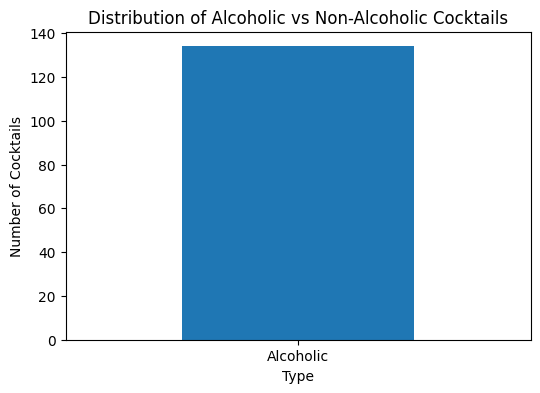

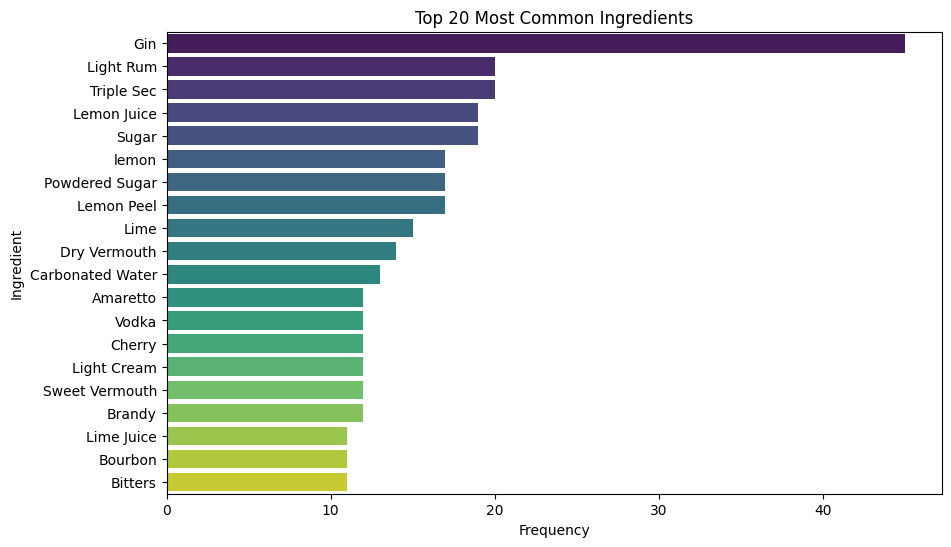

In [99]:
eda.perform_eda(data, ingredients_df)

# DBSCAN

In [100]:
from sklearn.decomposition import PCA
from preprocessing import preprocess_ingredients, preprocess_measures, preprocess_glass_type
from clustering import apply_dbscan, calculate_silhouette_score
from visualization import plot_clusters
from metrics import print_metrics

In [101]:
ingredient_names_df = preprocess_ingredients(ingredients_df)
measure_scaled_df = preprocess_measures(ingredients_df)
glass_df = preprocess_glass_type(ingredients_df)

final_data = pd.concat([measure_scaled_df, ingredient_names_df, glass_df], axis=1)

In [102]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(final_data)

Silhouette Score for DBSCAN clustering: 0.8689897852301846


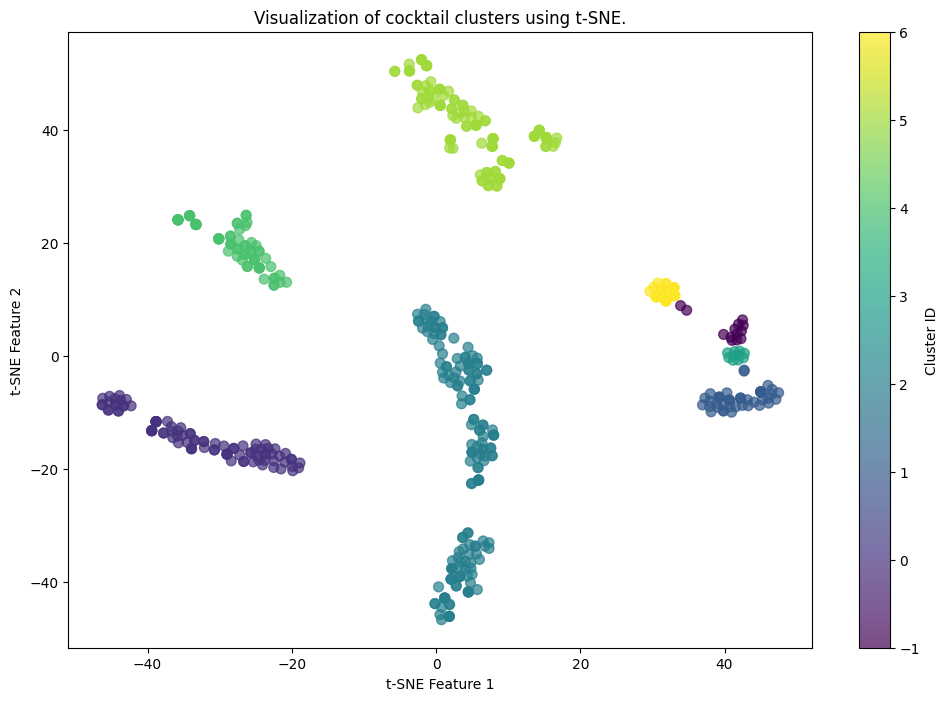

In [103]:
dbscan_clusters = apply_dbscan(reduced_data, eps=0.5, min_samples=5)

# Calculate Silhouette Score for DBSCAN Clusters
dbscan_silhouette_score = calculate_silhouette_score(reduced_data, dbscan_clusters)
if dbscan_silhouette_score is not None:
    print(f"Silhouette Score for DBSCAN clustering: {dbscan_silhouette_score}")
else:
    print("Only one cluster found; silhouette score is not applicable.")

plot_clusters(ingredients_df, reduced_data, dbscan_clusters)

In [51]:
print_metrics(data, ingredients_df)

Number of cocktails: 134
Number of unique ingredients: 102
